In [1]:
import sys
sys.path.append('modules')

from data_utils import *


c:\Users\mgjfl\miniconda3\envs\miner\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.0, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


<Figure size 640x480 with 0 Axes>

















































































































































































































































































[3893/4096 | 0.00 GB| 6.0879e-04]:  25%|██▍       | 123/500 [00:01<00:05, 68.97it/s]





































































































































































































































































































































































































































































































































































































































































Total time 0.49 minutes
PSNR:  44.078723365589894
Total pararmeters: 1.78 million


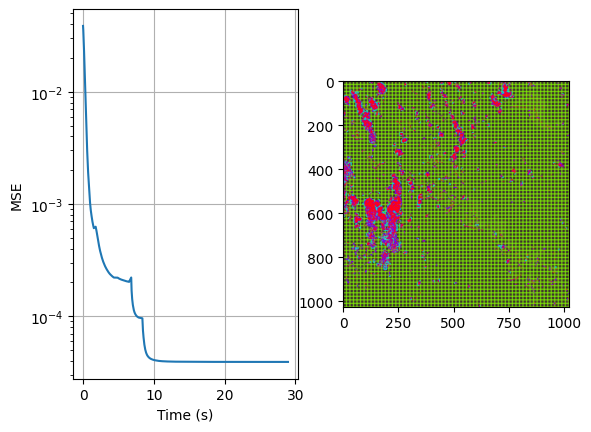

In [8]:
# Read png image (True) or tensor (False)
variant = "satellite" # Choose from: image | kaggle | satellite
satellite_part = 1


# Image configuration
configuration = read_config(config_type = variant, nscales = 4)

stopping_mse = 1e-5
target_mse = 1e-5

if variant == "image":
    # Read the image
    image = readImage("pluto", configuration)
elif variant == "kaggle":
    # Load data
    root_dir = os.path.join(os.getcwd(), "..", "data", "EuroSATallBands", "Industrial")
    dataset = Sentinel2Dataset(root_dir=root_dir)
    index = 0
    tensor = dataset[index].transpose(2,0)

    image = readTensor(tensor, index, configuration)
elif variant == "satellite":
    root_dir = os.path.join(os.getcwd(), "..", f"Sattelite Images Dataset Part{satellite_part}", "np_downscaled_and_cropped")
    satellite_dataset = SatelliteDataset(root_dir)
    index = 2
    tensor = satellite_dataset[index].transpose(2,0)

    image = readTensor(tensor, index, configuration)


visualization_channels = TRUE_COLOR if variant != "image" else None

# Run MINER
information = run_miner(image, configuration, visualize_image = True, visualization_channels = visualization_channels, stopping_mse=stopping_mse, target_mse=target_mse)

# Plot the results
plotMINERimage(image, configuration, information, visualization_channels = visualization_channels)


In [4]:
with open(os.path.join(configuration.savedir, "metrics.pkl"), "rb") as f:
    metrics = pickle.load(f)

metrics

{'mse_array': array([3.87097299e-02, 3.78197208e-02, 3.67830843e-02, ...,
        3.89827219e-05, 3.89831366e-05, 3.89845554e-05]),
 'time_array': array([0.00000000e+00, 1.83634758e-02, 3.03637981e-02, ...,
        3.61301782e+01, 3.61782618e+01, 3.62223799e+01]),
 'nparams': 1776729,
 'memory_array': array([0., 0., 0., 0.]),
 'nparams_array': array([872448.,  60486., 208590., 635205.]),
 'psnr_best_im': 44.08728107741087,
 'psnr_array': array([32.16357751, 36.37846762, 39.64875593, 44.0868863 ]),
 'total_bits_cumulative_array': array([27934904, 29888368, 36581416, 56924896]),
 'bits_per_pixel_array': array([26.64080048, 28.50376892, 34.8867569 , 54.28781128])}

: 